# Linear algebra and NumPy

This morning we will revisit some linear algebra using the NumPy library in python. 

**For the following exercises, use numpy vector/matrix operations. Do not use a for loop unless given explicit instructions**

## Part 0: Important Numpy Notes:

In an numpy array, a **row vector** is defined as:

```python
a = np.array([[1, 2, 3]])
```
The shape of `a` is `(1, 3)`.

A **column vector** is defined as:
```python
b = np.array([[1], [2], [3]])
```
The shape of `b` is `(3, 1)`.

Ensure that you check the `shape` of all the vectors throughout the exercise.
If the shape is missing a value, i.e. `(3,)` or  `(,3)`, use `np.newaxis` to
restore the correct dimensions.

In [1]:
import numpy as np

## Part 1: Linear Algebra Practice:

### Part 1.1

The [stochastic matrix](https://en.wikipedia.org/wiki/Stochastic_matrix) or a Markov Matrix is a useful mathematical construct.  It is used to characterize transitions for a finite [Markov chain](https://en.wikipedia.org/wiki/Markov_chain). [A markov chain](https://en.oxforddictionaries.com/definition/us/markov_chain) can be described as follows:

>a stochastic model describing a sequence of possible events in which the probability of each event depends only  on the state attained in the previous event.

The stoichastic matrix is a square matrix specifying the probabilities of going from one state to the other such that every column of the matrix sums to 1.

The probability of entering a certain state depends only on the last state occupied and the stochastic matrix, not on any earlier states.

Suppose that the 2004 **state of land use** in a city of 60 $\textrm{miles}^2$ of built-up
area is:



```
In 2004:
   
C (Commercially Used): 25%
I (Industrially Used): 20%
R (Residentially Used): 55%
```

Find the **state of land use** in **2009** and **2014**,
assuming that the transition probabilities for 5-year intervals are given
by the matrix **A** and remain practically the same over the time considered.

The following matrix can help visualize this process:

$$
    \mathbf{A} =
    \begin{pmatrix}
    C\rightarrow C & I\rightarrow C & R \rightarrow C \\ 
    C\rightarrow I & I\rightarrow I & R \rightarrow I \\ 
    C\rightarrow R & I\rightarrow R & R \rightarrow R \\ 
    \end{pmatrix}
    = 
    \begin{pmatrix}
    0.7 & 0.1 & 0.0\\ 
    0.2 & 0.9 & 0.2\\ 
    0.1 & 0.0 & 0.8\\
    \end{pmatrix}
$$

In [2]:
# Question 1
# Create the stochastic matrix shown above
a = np.array([[0.7,0.1,0.],[0.2,0.9,0.2],[0.1,0.,0.8]])
print(a)

[[ 0.7  0.1  0. ]
 [ 0.2  0.9  0.2]
 [ 0.1  0.   0.8]]


In [3]:
# Question 2
# Create a vector representing the initial state of land use
x = np.array([[.25,.2,.55]]).T
print(x)

[[ 0.25]
 [ 0.2 ]
 [ 0.55]]


In [5]:
# Question 3
# Determine the state of land use in 2009
y_2009 = np.dot(a,x)
print(y_2009)

[[ 0.195]
 [ 0.34 ]
 [ 0.465]]


In [6]:
# Question 4
# Determine the state of land use in 2014
y_2014 = np.dot(a,y_2009)
print(y_2014)

[[ 0.1705]
 [ 0.438 ]
 [ 0.3915]]


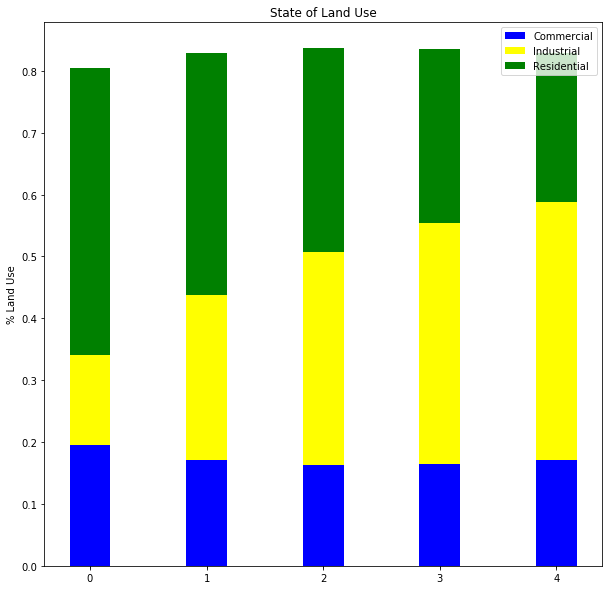

In [17]:
# Extra credit
# look at the following example plot and modify it to visualize the trend until 2029

import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

year = 2009
land_use = []
while year<=2029:
    if year == 2009:
        land_use.append(np.dot(a,x))
    else:
        land_use.append(np.dot(a,land_use[-1]))
    year +=5

land_use_mat = np.hstack(land_use)

data1 = land_use_mat[0]
data2 = land_use_mat[1]
data3 = land_use_mat[2]

ind = np.arange(land_use_mat.shape[1]) # the x locations for the groups
width = 0.35                           # the width of the bars: can also be len(x) sequence

p1 = ax.bar(ind, data1, width, color='blue')
p2 = ax.bar(ind, data2, width, color='yellow', bottom=data1)
p3 = ax.bar(ind, data3, width, color='green', bottom=data2)

ax.set_ylabel('% Land Use')
ax.set_title('State of Land Use')
ax.set_xticks(ind, [str(range(2009,2030,5))])
ax.legend((p1[0], p2[0], p3[0]), ('Commercial', 'Industrial', 'Residential'))

In [15]:
land_use_mat.sum(axis=0)

array([ 1.,  1.,  1.,  1.,  1.])